## Some practice with a data file and Python lists, dictionaries and sets

v2.03, 10 October 2017, Brian Fiedler

If you are viewing this ipython notebook at https://anaconda.org/bfiedler and you want to run it, be sure to download it by clicking on the *Download* tab that you see to the right, immediately above this notebook.

Googling "scrabble word list text file" lead me to this unofficial [github file of valid scrabble words](https://github.com/jonbcard/scrabble-bot/raw/master/src/dictionary.txt). All the words come to you capitalized, so they appear as they would using [Scrabble](https://en.wikipedia.org/wiki/Scrabble) tiles.  None of the words are longer than 15 letters. Proper nouns are not allowed in Scrabble. So the uncapitalized words should be valid spellings. For example, you will not find OKLAHOMA in the list. 

Note the call to **HTML** in a cell below, to modify [notebook style](http://nbviewer.ipython.org/github/ketch/teaching-numerics-with-notebooks/blob/master/Styling_notebooks.ipynb). It is optional to include such style modification in a notebook.  I like the light green background in the markdown cells.

By the way, a perhaps simpler presentation of these concepts can be found in my "trinkets".
But be patient when you click on these links. You may need about ten seconds before the tab can be accessed. These short programs download and run in your browser:

https://trinket.io/python/56a03639a8

https://trinket.io/python/aba77ec73a

https://trinket.io/python/b6f72c97fe

https://trinket.io/python/3fc8f9b55e

https://trinket.io/python/28381dc6ef

In [1]:
from IPython.core.display import HTML

# maybe a better way to modify style is to save the text into a file, such as my_css.css. Then uncomment:
#HTML( open('./my_css.css').read() )

HTML("""
<style>
div.text_cell_render{
    background-color: #efe;
    }
.rendered_html code {
    background-color: #efe;
    color: #900;
    }
.rendered_html pre {
    background-color: #efe;
    color: #900;
}

</style>
""")

In [2]:
import urllib.request 
try:
    filehandle = open('github_scrabble.txt','r') # 'r' means read only. That's the default so it can be omitted.
except:
    url = "https://github.com/jonbcard/scrabble-bot/raw/master/src/dictionary.txt"
    filehandle = urllib.request.urlopen(url)
    print("you may want to save github_scrabble.txt from the URL, and save it to your computer")
lines = filehandle.readlines()

you may want to save github_scrabble.txt from the URL, and save it to your computer


In [3]:
if len(lines) > 10000:
    print("You apparently loaded the scrabble words")
else:
    print("something failed:", len(lines))

You apparently loaded the scrabble words


In [4]:
lines[75691] # item at index 75691

b'IMPLACABILITY\n'

In [5]:
lines[75688:75692] # A slice of the list. Up to, but NOT including, the index to the right of the :

[b'IMPISHNESS\n', b'IMPISHNESSES\n', b'IMPLACABILITIES\n', b'IMPLACABILITY\n']

In [6]:
lines[-10:]

[b'ZYMOSAN\n',
 b'ZYMOSANS\n',
 b'ZYMOSES\n',
 b'ZYMOSIS\n',
 b'ZYMOTIC\n',
 b'ZYMURGIES\n',
 b'ZYMURGY\n',
 b'ZYZZYVA\n',
 b'ZYZZYVAS\n',
 b'ZZZ']

## Clean the data
Note that every item (but the last) in the list `lines` has a newline character, the `\n`, at the end of the string. And the data items are not true stings yet, but bytes. We need to remove that newline character from all the items. Also, there are a few blank lines at the end.

In [7]:
words=[] #initialize an empty list
for line in lines:
    word = line.rstrip().decode()
    if len(word)>0: words.append(word) 
        
words[-10:] # slice from 10 items from the end, to the end

['ZYMOSAN',
 'ZYMOSANS',
 'ZYMOSES',
 'ZYMOSIS',
 'ZYMOTIC',
 'ZYMURGIES',
 'ZYMURGY',
 'ZYZZYVA',
 'ZYZZYVAS',
 'ZZZ']

## Slicing sequences
*strings* and *lists* are sequences, and both have the same **slice** syntax

In [8]:
pickaword = words[-5] # pickaword is the 5th word from the end
print( pickaword )
print( pickaword[4] )
print( pickaword[0:8] ) # up to, but NOT including 4
print( pickaword[0:8:2] ) # stepping by 2
print( pickaword[::] )
print( pickaword[::-1] ) # step by -1, defaults to starting from end

ZYMURGIES
R
ZYMURGIE
ZMRI
ZYMURGIES
SEIGRUMYZ


## Examine a word
Let's pick a word and examine it for a property

In [9]:
pickaword = words[19998]
reverseit = pickaword[::-1] # Python's way of reversing a word
print(pickaword)
print(reverseit)
isPalindrome = pickaword == reverseit
print(isPalindrome)

BUNCH
HCNUB
False


In [10]:
'RADAR' in words

True

### Palindromes
So word 19998 is not equal to its reverse.  It is not a palindrome. But some words are:

In [11]:
count=0
for word in words:
    reverseit = word[::-1]
    if reverseit == word:
        count += 1
        print(word, reverseit)
print("found this many palindromes:",count)

AA AA
ABA ABA
ABBA ABBA
AGA AGA
AHA AHA
ALA ALA
ALULA ALULA
AMA AMA
ANA ANA
ANNA ANNA
AVA AVA
AWA AWA
BIB BIB
BOB BOB
BOOB BOOB
BUB BUB
CIVIC CIVIC
DAD DAD
DEED DEED
DEIFIED DEIFIED
DEKED DEKED
DELED DELED
DENNED DENNED
DEWED DEWED
DID DID
DUD DUD
EKE EKE
EME EME
ERE ERE
EVE EVE
EWE EWE
EYE EYE
GAG GAG
GIG GIG
HAH HAH
HALALAH HALALAH
HALLAH HALLAH
HEH HEH
HUH HUH
KAIAK KAIAK
KAYAK KAYAK
KEEK KEEK
KOOK KOOK
LEVEL LEVEL
MADAM MADAM
MARRAM MARRAM
MEM MEM
MIM MIM
MINIM MINIM
MM MM
MOM MOM
MUM MUM
NAAN NAAN
NAN NAN
NOON NOON
NUN NUN
OHO OHO
ONO ONO
OTTO OTTO
OXO OXO
PAP PAP
PEEP PEEP
PEP PEP
PIP PIP
POOP POOP
POP POP
PULLUP PULLUP
PUP PUP
RADAR RADAR
REDDER REDDER
REFER REFER
REIFIER REIFIER
REPAPER REPAPER
REVIVER REVIVER
ROTATOR ROTATOR
ROTOR ROTOR
SAGAS SAGAS
SEES SEES
SELLES SELLES
SEMEMES SEMEMES
SEMES SEMES
SERES SERES
SEXES SEXES
SHAHS SHAHS
SIS SIS
SOLOS SOLOS
SOS SOS
STATS STATS
STETS STETS
STOTS STOTS
SULUS SULUS
TAT TAT
TENET TENET
TERRET TERRET
TET TET
TIT TIT
TOOT TOOT
TOROT TO

## A list comprehension for cleaning data
Next we show the very useful *list comprehension* syntax of Python, where we put a little program inside the `[ ]`.

In [12]:
shortlist = ['cat\n','dog\n']
newlist = [x.rstrip() for x in shortlist]
newlist

['cat', 'dog']

## Confusion about the reserved word `in`
Next we clear up a seemingly small issued that can perplex students. Python has two different uses for the reserved word `in`. The first use is to test for membership.  The second use is in a *for loop*.  The fact that `in` has two meanings seems consistent with the two uses in the English language.  But students can really become confused by it:

In [13]:
'cat' in newlist

True

In [14]:
for x in newlist:
    print(x)

cat
dog


### The 'ia' and 'ium' word pairs

This was a task for year 2014 freshman students.

In [15]:
for word in words:
    if word[-2:]=='IA' and word[:-2]+'IUM' in words:
        print(word, word[:-2]+'IUM')

ACTINIA ACTINIUM
AECIA AECIUM
AECIDIA AECIDIUM
AEROBIA AEROBIUM
ALLODIA ALLODIUM
ALLUVIA ALLUVIUM
ALODIA ALODIUM
AMMONIA AMMONIUM
ANAEROBIA ANAEROBIUM
ANDROECIA ANDROECIUM
ANTEPENDIA ANTEPENDIUM
ANTHERIDIA ANTHERIDIUM
ANTHODIA ANTHODIUM
APOTHECIA APOTHECIUM
APPRESSORIA APPRESSORIUM
APTERIA APTERIUM
AQUARIA AQUARIUM
ARCHAEBACTERIA ARCHAEBACTERIUM
ARCHEGONIA ARCHEGONIUM
ARCHESPORIA ARCHESPORIUM
ARMAMENTARIA ARMAMENTARIUM
ASCIDIA ASCIDIUM
ASCOGONIA ASCOGONIUM
ATRIA ATRIUM
AUDITORIA AUDITORIUM
BACTERIA BACTERIUM
BASIDIA BASIDIUM
BIENNIA BIENNIUM
BOTHRIA BOTHRIUM
BRACHIA BRACHIUM
BRONCHIA BRONCHIUM
CAFETORIA CAFETORIUM
CALDARIA CALDARIUM
CALVARIA CALVARIUM
CAMBIA CAMBIUM
CARPOGONIA CARPOGONIUM
CERIA CERIUM
CHONDROCRANIA CHONDROCRANIUM
CIBORIA CIBORIUM
CILIA CILIUM
CINERARIA CINERARIUM
CLOSTRIDIA CLOSTRIDIUM
COCCIDIA COCCIDIUM
COLLEGIA COLLEGIUM
COLLOQUIA COLLOQUIUM
COLLUVIA COLLUVIUM
COLLYRIA COLLYRIUM
COLUMBARIA COLUMBARIUM
COMPENDIA COMPENDIUM
CONIDIA CONIDIUM
CONSORTIA CONSORTIUM
CONTAGI

## Is the reversed word in words?
A palindrome tests whether the reverse of a word is equal to itself.
Here we find whether the reverse of a word is also in the list words.
But we only keep words of length greater than or equal to 7.
A Python *set* allows for **very efficient** test for membership. 
In the above search for *ia* and *ium* pairs, we only tested for membership
for the small number of words ending in *ia*, so the slow speed was tolerable.

In [16]:
wordset=set(words) 

In [17]:
gold=[] # will be a list of things that match the criteria
for word in words:
    reverseit = word[::-1]
    if len(word)<7 : continue # note continue means "don't go on"
    if reverseit in wordset: gold.append(word) 

You can experiment with the above by changing to `if reversit in words:`.  But it will be SLOW to complete. Go to the Kernel tab and select *Interrupt* to terminate the cell computation. 

In [18]:
len(gold)

23

In [19]:
for word in gold:
    print(word, word[::-1])


DEIFIED DEIFIED
DEIFIER REIFIED
DELIVER REVILED
DESSERT TRESSED
DESSERTS STRESSED
GATEMAN NAMETAG
HALALAH HALALAH
NAMETAG GATEMAN
REDRAWER REWARDER
REIFIED DEIFIER
REIFIER REIFIER
REKNITS STINKER
REPAPER REPAPER
REVILED DELIVER
REVIVER REVIVER
REWARDER REDRAWER
ROTATOR ROTATOR
SALLETS STELLAS
SEMEMES SEMEMES
STELLAS SALLETS
STINKER REKNITS
STRESSED DESSERTS
TRESSED DESSERT


## Counting words of the various lengths
We use a [Python dictionary](http://learnpythonthehardway.org/book/ex39.html), with the key being the number of letters and the value being the population (frequency) of such words.

In [20]:
counts={}
for word in words:
    key = len(word)
    if key not in counts:
        counts[key] = 1
    else:
        counts[key] += 1

In [21]:
keys = list( counts.keys() ) # In Python 3 counts.keys() would be an interator, so convert it to a list
keys.sort() # sorts in place, meaning the original keys is replaced

In [22]:
for k in keys: 
    print (k, counts[k])

2 101
3 1015
4 4030
5 8938
6 15788
7 24029
8 29766
9 29150
10 22326
11 16165
12 11417
13 7750
14 5059
15 3157


Next we demonstrate the `get` method for Python dictionaries.  The second argument provides the default value for initialization, in case the key does not exist yet in the dictionary. The next cell has replaced 4 lines of Python with 1.

In [23]:
counts={}
for word in words:
    key = len(word)
    counts[key] = counts.get(key,0) + 1 # if key is not in counts, initialize it, with value 0

In [24]:
counts

{2: 101,
 3: 1015,
 4: 4030,
 5: 8938,
 6: 15788,
 7: 24029,
 8: 29766,
 9: 29150,
 10: 22326,
 11: 16165,
 12: 11417,
 13: 7750,
 14: 5059,
 15: 3157}

In [25]:
nletters = list( counts.keys() ) # list conversion needed for python3
frequency = list( counts.values() )

In [26]:
print(nletters)
print(frequency)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[101, 1015, 4030, 8938, 15788, 24029, 29766, 29150, 22326, 16165, 11417, 7750, 5059, 3157]


Let's make a plot of our length distribution.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

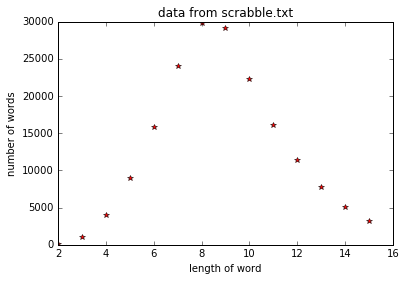

In [28]:
myfig,myaxes=plt.subplots()
myaxes.plot(nletters, frequency,'r*') # r means read, * means star
myaxes.set_title('data from scrabble.txt')
myaxes.set_xlabel('length of word')
myaxes.set_ylabel('number of words'); # <=experiment with this semi-colon!

## Sorting by property

Rather than just counting the words of various types, let's sort them and keep them.

In [29]:
bins = {}
for word in  words:
    if word[-1]==word[-2]:
        key = word[-2:]
        if key in bins:
            bins[key].append(word)
        else:
            bins[key] = [word]
            
for key in sorted(bins):
    inbin = bins[key]
    lbin = len(inbin)
    print(key, lbin, end='')
    if lbin<100:
        print(inbin)
    else:
        print(" Too many, here are a few:",inbin[-10:])
    

AA 4['AA', 'BAA', 'MARKKAA', 'RUFIYAA']
BB 5['BIBB', 'COBB', 'EBB', 'JIBB', 'SIBB']
DD 9['ADD', 'MISADD', 'ODD', 'OUTADD', 'READD', 'REDD', 'RUDD', 'SUDD', 'SUPERADD']
EE 375 Too many, here are a few: ['WEE', 'WEEWEE', 'WHANGEE', 'WHEE', 'WHIFFLETREE', 'WHIPPLETREE', 'WHOOPEE', 'YIPPEE', 'YOGEE', 'ZEE']
FF 154 Too many, here are a few: ['TRADEOFF', 'TUFF', 'TURNOFF', 'UNCUFF', 'WAFF', 'WAITSTAFF', 'WAVEOFF', 'WHIFF', 'WOODRUFF', 'YAFF']
GG 14['EGG', 'GLOGG', 'GOLLIWOGG', 'HOGG', 'IGG', 'JAGG', 'MAHJONGG', 'MIGG', 'MUGG', 'NOGG', 'RAGG', 'TEGG', 'VUGG', 'YEGG']
HH 2['AARRGHH', 'SHH']
II 17['AALII', 'BACCHII', 'CONGII', 'DENARII', 'GASTROCNEMII', 'GENII', 'MEDII', 'NAUPLII', 'RADII', 'RETIARII', 'SARTORII', 'SENARII', 'SEPTENARII', 'SEXTARII', 'SPLENII', 'TORII', 'TRAPEZII']
JJ 1['HAJJ']
LL 441 Too many, here are a few: ['WINDFALL', 'WINDGALL', 'WINDMILL', 'WINDOWSILL', 'WINTERKILL', 'WOOLFELL', 'XANTHOPHYLL', 'YELL', 'YILL', 'ZILL']
MM 4['HMM', 'MM', 'MUMM', 'UMM']
NN 8['BUNN', 'CONN', 

In [30]:
mystudy={} # empty dictionary. key will access a list
for word in words:
    key=len(word)
    mystudy.setdefault(key,[]).append(word) # if key does not exist, intialize value as []
for key in sorted(mystudy): # using sorted this way returns sorted keys
    thelist = mystudy[key]
    print(key, len(thelist) , thelist[-5:])
     # not too long? print the words

2 101 ['XU', 'YA', 'YE', 'YO', 'ZA']
3 1015 ['ZIT', 'ZOA', 'ZOO', 'ZUZ', 'ZZZ']
4 4030 ['ZOON', 'ZOOS', 'ZORI', 'ZOUK', 'ZYME']
5 8938 ['ZORIS', 'ZOUKS', 'ZOWIE', 'ZUZIM', 'ZYMES']
6 15788 ['ZYGOID', 'ZYGOMA', 'ZYGOSE', 'ZYGOTE', 'ZYMASE']
7 24029 ['ZYMOSES', 'ZYMOSIS', 'ZYMOTIC', 'ZYMURGY', 'ZYZZYVA']
8 29766 ['ZYMOGENS', 'ZYMOGRAM', 'ZYMOLOGY', 'ZYMOSANS', 'ZYZZYVAS']
9 29150 ['ZYMOLYSES', 'ZYMOLYSIS', 'ZYMOLYTIC', 'ZYMOMETER', 'ZYMURGIES']
10 22326 ['ZYGOMORPHY', 'ZYGOSITIES', 'ZYGOSPORES', 'ZYMOLOGIES', 'ZYMOMETERS']
11 16165 ['ZOOPLANKTER', 'ZOOPLANKTON', 'ZOOTECHNICS', 'ZWITTERIONS', 'ZYGOMORPHIC']
12 11417 ['ZOOXANTHELLA', 'ZWITTERIONIC', 'ZYGAPOPHYSES', 'ZYGAPOPHYSIS', 'ZYGOMORPHIES']
13 7750 ['ZOOGEOGRAPHIC', 'ZOOPLANKTONIC', 'ZOOSPORANGIUM', 'ZOOXANTHELLAE', 'ZYGODACTYLOUS']
14 5059 ['XEROPHTHALMIAS', 'YOUTHFULNESSES', 'ZOMBIFICATIONS', 'ZOOGEOGRAPHERS', 'ZOOGEOGRAPHIES']
15 3157 ['WORTHLESSNESSES', 'WRONGHEADEDNESS', 'XEROGRAPHICALLY', 'XERORADIOGRAPHY', 'ZOOGEOGRAPHICAL']


## Find words with  *a e i o u*, in order

In [31]:
for word in words:
    vonly=word # vonly will have all consontants removed
    for letter in 'BCDFGHJKLMNPQRSTVWXYZ'.upper():
        vonly=vonly.replace(letter,"") # replace letter with empty string 
    if vonly=='AEIOU': print(word)

ABSTEMIOUS
ABSTEMIOUSLY
ABSTENTIOUS
ARSENIOUS
FACETIOUS
FACETIOUSLY


# STUDENTS: Tasks for you!
In my freshman class METR 1313, students were expected to be able to complete these after about a month into the course.

In [32]:
prev = words[0] # the first word is stored as the previous word
count = 0
for word in words[1:]: # examine all words, skipping the first word
    if len(word) > len(prev): 
        count += 1
    prev = word # current word becomes the previous word
hit = 100.0*count/len(words) # percent of words satisfying criterion
print('percent of words longer than previous word:',hit)

percent of words longer than previous word: 51.85040097150948


Try finding the percent of words shorter than the previous words. I find 33.98 %. I conclude that as words lengthen, they tend to lengthen by a smaller amount than they shorten. The shortening tends to be a like a cold front or a stock market correction: an abrupt decrease.

## Your Task 1:  

Cut and paste the above code into a new cell.  For what percent does the word start with the previous word? We anticipate quite a few. But the "s" plural commonly will follow a noun. So we also find the percent that start with previous word, but that are not the "s" plural.  Here is what I find:

```
percent starting with previous word: 35.4785134775
...but not being the "s" plural: 17.5399002349
```

For debugging your cell, you may want to put in a line that is executed if the word "counts":
```python
print(word,prev)
```

The following tips may be helpful for your task. Do you know how to use Python's `and` and `or`?

In [33]:
prev = 'sooner'
word = 'sooners'
question1 = word.startswith(prev)
question2 = word != prev+'s'
print(question1,question2)

True False


In [34]:
lw=len(words)
prev = words[0] # the first word is stored as the previous word
count = 0
notscount = 0
for word in words[1:]: # examine all words, skipping the first word
#STUDENTS: put a few lines of code here!!
    prev = word # current word becomes the previous word
print('percent starting with previous word:', 100.*count/lw) 
print('...but not being the "s" plural:', 100.*notscount/lw) 

percent starting with previous word: 0.0
...but not being the "s" plural: 0.0


## Your Task 2:

Below study of words that end in 'r', but for which the word +'e' is not in scrabble.txt

Thus 'scar' is *not* studied, because 'scare' exists. 
We ask: should we double the 'r' before appending 'iest'?? Let's find out...

From the output I can infer a rule:
*one syllable and single vowel before 'r', then double the 'r'*

In [35]:
wordl=[x.lower() for x in words] #lower case words are easier to read, I think
wordset=set(wordl)
count=0 # count of words for which 'r' is not doubled
countt=0 # count of words for which 'r' is doubled
for word in wordl:
    if word[-1] != 'r': continue
    if word+'e' in wordset: continue
    simple = word + 'iest'
    double = word + 'riest'
    if simple in wordset:
         print(word,simple) 
         count+=1
    elif double in wordset:
        print(word,double,'*')
        countt+=1
print('simple=',count,'   double=',countt)


air airiest
beer beeriest
blear bleariest
blur blurriest *
bur burriest *
burr burriest
butter butteriest
charr charriest
cheer cheeriest
drear dreariest
feather featheriest
flower floweriest
fur furriest *
hair hairiest
hoar hoariest
jitter jitteriest
lear leariest
leer leeriest
moor mooriest
pucker puckeriest
rubber rubberiest
savor savoriest
savour savouriest
skitter skitteriest
slipper slipperiest
smear smeariest
sneer sneeriest
spider spideriest
sugar sugariest
summer summeriest
tear teariest
tower toweriest
water wateriest
wear weariest
winter winteriest
simple= 32    double= 3


Let's study this: [Why isn't edited spelt 'editted'?](http://www.lifehacker.com.au/2012/09/why-isnt-edited-spelt-editted/) Modify the above program to study words that end in it. Do we double the **t** before we append **ted**?


If your program is working, here are the last three lines that you should see:
```
yacht yachted
yeast yeasted
zest zested
simple= 1219    double= 145
```

In the middle of the output I see:
```
...
dust dusted
edit edited
effect effected
egest egested
eject ejected
elect elected
elicit elicited
emit emitted *
enact enacted
...
```
As stated in the reference, there is no general spelling rule that distinguishes *emitted* from *edited*.


In [36]:
# Fix this!
wordl=[x.lower() for x in words]
wordset=set(wordl)
count=0 # count of words for which 't' is not doubled
countt=0 # count of words for which 't' is doubled
for word in wordl:
    if word[-1] != 't': continue
    if word+'e' in wordset: continue
    simple = word + 'thisiswrong'
    double = word + 'thisiswrongtoo'
    if simple in wordset:
         print(word,simple) 
         count+=1
    elif double in wordset:
        print(word,double,'*')
        countt+=1
print('simple=',count,'   double=',countt)


simple= 0    double= 0


## Your Task 3:

What words have the most consective consonants?  Below is a program that finds the number of *consective consonants* in a word, and sorts the words by that number.

**Your task:** modify the program to sort words by the maximum number of *consecutive vowels*, but not allowing 'y' to be counted as a vowel.

In [37]:
# returns the maximum number of consective consonants
def consec(aword):
    maxrun = 0
    champion = 0
    for letter in aword:
        if letter in 'aeiouy':
            maxrun = 0 # reset the count of consecutive consonants
        else:
            maxrun += 1 
            champion = max(champion,maxrun) # compare with any previous champion
    return champion

In [38]:
consec('church')

3

In [39]:
cstudy={}
for word in wordl: # look at each word 
    key = consec(word) # diagnose quantitative word property
    # If list for that key does not exist, initialize it.
    # If the list does exist, append the word to it: 
    cstudy.setdefault(key,[]).append(word) # two steps in one line

# now print out the results of the sorting
allkeys = list( cstudy.keys() )
allkeys.sort()
print('here are all the keys',allkeys)
for key in allkeys:
    thelist = cstudy[key]
    lenlist = len( thelist )
    print( key, lenlist )
    # also print the list if not too long
    if lenlist < 200 : print( thelist ) 

here are all the keys [0, 1, 2, 3, 4, 5, 6, 7]
0 16
['aa', 'ae', 'ai', 'ay', 'aye', 'eau', 'eye', 'oe', 'oi', 'oy', 'ya', 'yay', 'ye', 'yea', 'yo', 'you']
1 25661
2 111682
3 37611
4 3530
5 179
['aarrghh', 'angstrom', 'angstroms', 'angsts', 'archpriest', 'archpriests', 'backsplash', 'backsplashes', 'backstreet', 'backstreets', 'backstretch', 'backstretches', 'backstroke', 'backstrokes', 'birthplace', 'birthplaces', 'birthstone', 'birthstones', 'borscht', 'borshts', 'braunschweiger', 'braunschweigers', 'breaststroke', 'breaststroker', 'breaststrokers', 'breaststrokes', 'bremsstrahlung', 'bremsstrahlungs', 'bunchgrass', 'bunchgrasses', 'catchflies', 'catchfly', 'corkscrew', 'corkscrewed', 'corkscrewing', 'corkscrews', 'crwth', 'dirndls', 'downstream', 'downstroke', 'downstrokes', 'downthrow', 'downthrows', 'draughtsman', 'draughtsmen', 'dumbstruck', 'earthshaker', 'earthshakers', 'earthshaking', 'earthshakingly', 'earthshine', 'earthshines', 'earthstar', 'earthstars', 'eighthly', 'eighths